# Identifier les clients à fort potentiel du programme de fidélité - Canada Flight

## **Objectif** : Identifier les facteurs clés qui différencient les clients engagés des désengagés

### **Nettoyage de la table 'Customer Flight Activity'** 

In [1]:
# Importation des librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lecture du fichier "Customer Flight Activity"
flight = pd.read_csv("./data/Customer_Flight_Activity.csv", sep=";")
flight.head(10)

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0
5,100590,2018,4,0,0,0.0,0,0
6,100590,2018,3,0,0,0.0,0,0
7,100590,2018,8,0,0,0.0,0,0
8,100590,2018,9,0,0,0.0,0,0
9,100590,2018,11,0,0,0.0,0,0


In [3]:
# Afficher les 10 dernières lignes du dataframe
flight.tail(10)

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
392926,999986,2018,8,8,14680,22020.0,655,118
392927,999986,2018,11,6,4338,6507.0,0,0
392928,999986,2018,10,4,4588,6882.0,0,0
392929,999986,2018,2,1,1786,2679.0,544,98
392930,999986,2018,3,1,1069,1603.5,0,0
392931,999986,2018,4,0,0,0.0,0,0
392932,999986,2018,5,0,0,0.0,0,0
392933,999986,2018,6,0,0,0.0,0,0
392934,999986,2018,9,0,0,0.0,0,0
392935,999986,2018,12,0,0,0.0,0,0


In [4]:
# Visuliser les informations globales du dataframe
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB


Les formats des colonnes sont corrects. Pas de valeurs nulles

In [5]:
# Uniformiser les colonnes (convention snake_case)
flight.columns = (flight.columns
                  .str.strip()
                  .str.lower()
                  .str.replace(" ","_")
                 )

In [6]:
# Vérifier les doublons
pd.set_option("display.max_rows", None)
flight[flight.duplicated(keep=False)]

,loyalty_number,year,month,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
176808,357901,2018,2,0,0,0.0,0,0
176809,357901,2018,2,0,0,0.0,0,0
176810,357901,2018,3,0,0,0.0,0,0
176811,357901,2018,3,0,0,0.0,0,0
176812,357901,2018,4,0,0,0.0,0,0
176813,357901,2018,4,0,0,0.0,0,0
176818,357901,2018,9,0,0,0.0,0,0
176819,357901,2018,9,0,0,0.0,0,0
176821,357901,2018,11,0,0,0.0,0,0
176822,357901,2018,11,0,0,0.0,0,0


On observe plusieurs mois dupliqués pour un seul client avec aucune activité sur ces lignes. Pas besoin de les supprimer car agrégation par client à faire

In [7]:
pd.reset_option("display.max_rows")

# Agréger le total de vols par clients 
flight_agg = ( 
    flight
    .groupby("loyalty_number", as_index= False)
    .agg({"total_flights":"sum",})
)

flight_agg

,loyalty_number,total_flights
0,100018,46
1,100102,51
2,100140,47
3,100214,22
4,100272,37
...,...,...
16732,999902,50
16733,999911,0
16734,999940,18
16735,999982,6


In [8]:
#Visualiser les statistiques descriptives
flight_agg.describe()

,loyalty_number,total_flights
count,16737.000000,16737.000000
mean,549735.880445,30.400191
std,258912.132453,16.865558
min,100018.000000,0.000000
25%,326603.000000,20.000000
50%,550434.000000,34.000000
75%,772019.000000,42.000000
max,999986.000000,106.000000


Les valeurs sont cohérentes. Des valeurs maximales assez élevées par rapport à la moyenne pour les variables 'total_flights', 'distance', 'points_accumulated'.

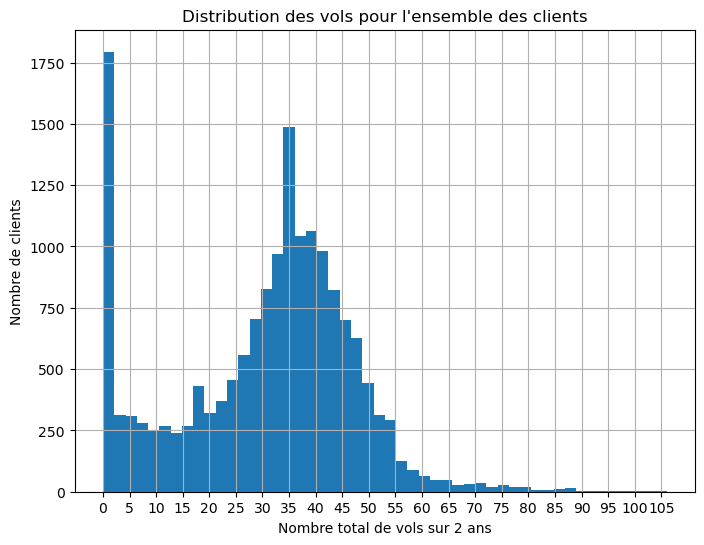

In [10]:
# Visualiser la distribution des effectifs clients selon le total de vols effectués
plt.figure(figsize=(8,6))
flight_agg["total_flights"].hist(bins=50)
plt.title("Distribution des vols pour l'ensemble des clients")
plt.xlabel("Nombre total de vols sur 2 ans")
plt.ylabel("Nombre de clients")
plt.xticks(range(0,110,5))
plt.show()
           

Forte concentration du nombre de vols se situe entre 20 et 50 vols. De nombreux clients on également effectué moins de 20 vols.

### **Nettoyage de la table 'Customer Loyalty History'** 

In [12]:
# Lecture du fichier "Customer Loyalty History"
customer = pd.read_csv("./data/Customer_Loyalty_History.csv", sep=";")
customer.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [13]:
#Visualiser les informations globale du dataframe 
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

Les formats sont correctes, on observe plusieurs colonnes avec des valeurs manquantes notamment la colonne "Salary".

In [14]:
# Visualisation des statistiques descriptives 
customer.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


On observe une valeur minimale incohérente dans la colonne Salary (-58486), de même des valeurs maximales assez élevées par rapport à la moyenne pour les variables Salary et CLV
Les variables restantes sont cohérentes 

In [15]:
# Uniformiser les colonnes (convention snake_case)
customer.columns = (customer.columns
                  .str.strip()
                  .str.lower()
                  .str.replace(" ","_")
                 )

In [16]:
# Vérifier les salaires négatifs 
customer[customer["salary"] <=0]

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


Les salaires négatifs concernent majoritaires les clients dont le niveau d'étude est "Bachelor".

In [17]:
# Total des salaires négatifs
customer[customer["salary"] <=0]["salary"].count()


20

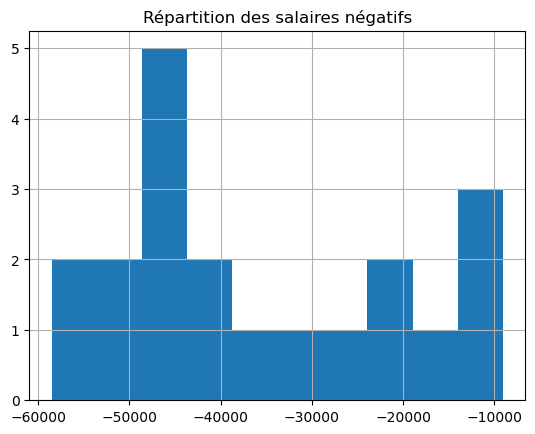

In [18]:
#Visualiser la distribution des salaires négatifs
customer[customer["salary"] <=0]["salary"].hist()
plt.title("Répartition des salaires négatifs")
plt.show()

En valeur absolue, les salaires sont situés entre 9000 et 60000 dollars

In [19]:
#Filtrer le dataframe sur les salaires supérieures à 0 
positive_salary = customer[customer["salary"] > 0]

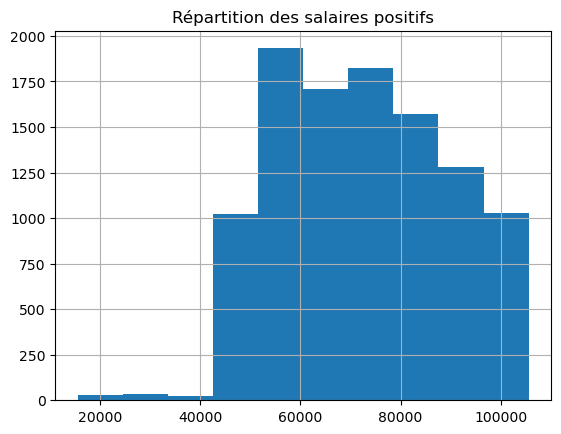

In [20]:
# Visualiser la distribution des salaires supérieurs à 0 pour les clients dont le niveau d'étude est "Bachelor"
positive_salary[positive_salary["education"]=="Bachelor"]["salary"].hist()
plt.title("Répartition des salaires positifs")
plt.show()

Les salaires positifs sont situés entre 10 000 et plus de 100 000. 
Les salaires négatifs se situent bien dans cette tranche en valeur absolue. 

In [21]:
#Appliquer la valeur absolue aux salaires négatifs
customer["salary"] = customer["salary"].apply(lambda x: abs(x) if x < 0 else x)

In [22]:
# Vérifier les modifications
customer[customer["salary"]<0]

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month


In [23]:
# Vérifier les valeurs nulles 
customer.isnull().sum()

loyalty_number            0
country                   0
province                  0
city                      0
postal_code               0
gender                    0
education                 0
salary                 4238
marital_status            0
loyalty_card              0
clv                       0
enrollment_type           0
enrollment_year           0
enrollment_month          0
cancellation_year     14670
cancellation_month    14670
dtype: int64

In [24]:
# Filtre sur les lignes ayant des valeurs nulles dans la colonne "Salary"
customer[customer["salary"].isnull()]

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN
13,988178,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Single,Star,3871.07,Standard,2013,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,632951,Canada,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Married,Star,44771.30,Standard,2018,7,NaN,NaN
16727,546773,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Married,Star,52811.49,Standard,2015,9,NaN,NaN
16731,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,College,NaN,Single,Star,61134.68,Standard,2012,9,NaN,NaN
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN


In [25]:
# Vérifier les valeurs uniques pour la variable "Education" des salaires manquants
nul_salary = customer[customer["salary"].isnull()]

nul_salary["education"].unique()

array(['College'], dtype=object)

Les salaires manquants concernent les adhérents dont le niveau d'études est "College"

In [26]:
# Vérifier s'il y a des salaires indiqués pour les clients dont le niveau d'études est "College"
customer[~(customer["salary"].isnull()) & (customer["education"]=="College")]

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month


Tous les salaires des personnes ayant un niveau 'College' sont manquants

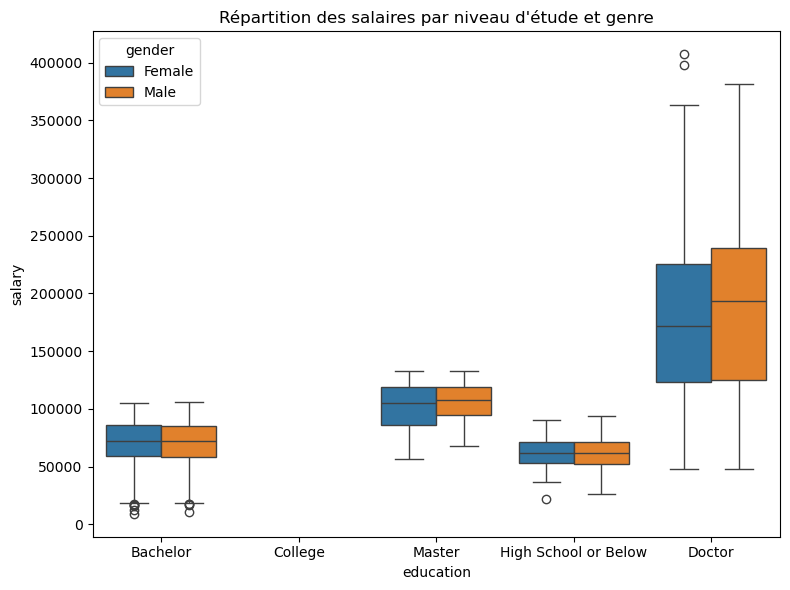

In [27]:
# Répartition des salaires par niveau d'études
plt.figure(figsize=(8,6))
sns.boxplot(customer, x="education", y="salary", hue="gender")
plt.title("Répartition des salaires par niveau d'étude et genre")
plt.tight_layout()
plt.show()

On observe quelques outliers pour les salaires des "Bachelors" et "High School".
Préférable d'utiliser la médiane par niveau d'étude et genre pour imputer les salaires manquants

In [28]:
# Calculer la médiane des salaires par niveau d'etude et par genre
median_salary = customer.groupby(["education","gender"])["salary"].median()

# Calculer le salaire pour les clients de niveau "College" (College se situe entre High School et Bachelor)
college_salary = (median_salary["Bachelor"] + median_salary["High School or Below"])/2
college_salary

gender
Female    67178.0
Male      66801.5
Name: salary, dtype: float64

In [29]:
# Imputer les salaires manquants  dans le dataframe
for gender in customer["gender"].unique():
    customer.loc[(customer["salary"].isnull()) &
                 (customer["gender"]==gender) &
                 (customer["education"]=="College"),
                  "salary"
                ]=college_salary[gender]
        

In [30]:
# Vérifier l'imputation 
customer[customer["education"]=="College"]

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,66801.5,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,66801.5,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,66801.5,Single,Star,3839.75,Standard,2013,2,NaN,NaN
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,67178.0,Single,Star,3857.95,Standard,2014,6,NaN,NaN
13,988178,Canada,Quebec,Montreal,H4G 3T4,Male,College,66801.5,Single,Star,3871.07,Standard,2013,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,632951,Canada,Alberta,Edmonton,T9G 1W3,Female,College,67178.0,Married,Star,44771.30,Standard,2018,7,NaN,NaN
16727,546773,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,66801.5,Married,Star,52811.49,Standard,2015,9,NaN,NaN
16731,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,College,66801.5,Single,Star,61134.68,Standard,2012,9,NaN,NaN
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,67178.0,Married,Star,61850.19,Standard,2012,12,NaN,NaN


In [31]:
# Vérifier les doublons
customer[customer.duplicated()]


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month


In [32]:
# Fusion des deux dataframes "Customer Flight Activity" et "Customer Loyalty History"
customer_flight = customer.merge(flight_agg, how="outer", on="loyalty_number", indicator=True)
customer_flight.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,total_flights,_merge
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,46,both
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,66801.5,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,51,both
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,67178.0,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,47,both
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,22,both
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,37,both


In [33]:
# Vérifier les lignes jointes 
customer_flight[customer_flight["_merge"]!="both"]

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,total_flights,_merge


Toutes les lignes ont bien été jointes, il n'y pas de lignes sans correspondance

In [34]:
#Suppression de la colonne "_merge"
customer_flight.drop("_merge", axis=1, inplace=True)

## **Feature engineering (création de nouvelles colonnes)**

In [35]:
# Suppression des clients qui ont annulé leur abonnement
customer_flight = customer_flight[customer_flight["cancellation_year"].isnull()]
customer_flight

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,total_flights
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,46
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,66801.5,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,51
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,67178.0,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,47
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,22
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,999902,Canada,Ontario,Toronto,M1R 4K3,Male,College,66801.5,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN,50
16733,999911,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN,0
16734,999940,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN,18
16735,999982,Canada,British Columbia,Victoria,V10 6T5,Male,College,66801.5,Married,Star,2631.56,Standard,2018,7,NaN,NaN,6


In [36]:
# Créer une colonne "engement_status" qui contient les clients engagés et les clients désengagés (peu actifs et inactifs)
customer_flight["engagement_status"] = np.where(customer_flight["total_flights"] > 20, "Engaged", "Disengaged")

In [37]:
# Le nombre de clients par statut
customer_flight["engagement_status"].value_counts()

engagement_status
Engaged       12066
Disengaged     2604
Name: count, dtype: int64

In [38]:
# Création de la colonne 'ancienneté' par client 
customer_flight["lifespan"] = 2018 - customer_flight["enrollment_year"]
customer_flight.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,total_flights,engagement_status,lifespan
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,46,Engaged,2
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,66801.5,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,51,Engaged,5
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,67178.0,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,47,Engaged,2
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,22,Engaged,3
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,37,Engaged,4


In [39]:
# Créer une colonne de date d'engagement en combinant l'année et le mois d'engagement
customer_flight["enrollment_date"] = (
    customer_flight[["enrollment_year","enrollment_month"]].astype(str)
    .apply("-".join, axis=1)
)

# Convertir la variable au format datetime
customer_flight["enrollment_date"] = pd.to_datetime(customer_flight["enrollment_date"])

customer_flight.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,total_flights,engagement_status,lifespan,enrollment_date
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,46,Engaged,2,2016-08-01
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,66801.5,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,51,Engaged,5,2013-03-01
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,67178.0,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,47,Engaged,2,2016-07-01
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,22,Engaged,3,2015-08-01
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,37,Engaged,4,2014-01-01


In [40]:
# Suppresion des colonnes non pertinentes 
customer_flight = customer_flight.drop(["country", "city", "postal_code","enrollment_year",
                              "enrollment_month","cancellation_year","cancellation_month"], axis=1)

In [42]:
# Renommer la variable clv (customer_lifetime_value)
customer_flight.rename(columns={"clv":"customer_lifetime_value"}, inplace=True)

customer_flight.head()

,loyalty_number,province,gender,education,salary,marital_status,loyalty_card,customer_lifetime_value,enrollment_type,total_flights,engagement_status,lifespan,enrollment_date
0,100018,Alberta,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,46,Engaged,2,2016-08-01
1,100102,Ontario,Male,College,66801.5,Single,Nova,2887.74,Standard,51,Engaged,5,2013-03-01
2,100140,British Columbia,Female,College,67178.0,Divorced,Nova,2838.07,Standard,47,Engaged,2,2016-07-01
3,100214,British Columbia,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,22,Engaged,3,2015-08-01
4,100272,Ontario,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,37,Engaged,4,2014-01-01


In [43]:
# Exporter les données au format CSV
customer_flight.to_csv("customer_flight.csv", index=False)